In [1]:
# Define the file paths
file1_path = 'data/data.txt'
file2_path = 'data/data2.txt'
output_file_path = 'data/output.txt'

# Read the files and combine their data without duplication
unique_lines = set()

# Read the first file
with open(file1_path, 'r') as file1:
    for line in file1:
        unique_lines.add(line.strip())

# Read the second file
with open(file2_path, 'r') as file2:
    for line in file2:
        unique_lines.add(line.strip())
print(len(unique_lines))
# Write the combined unique data to the output file
with open(output_file_path, 'w') as output_file:
    for line in unique_lines:
        output_file.write(line + '\n')

print(f"Combined data has been written to {output_file_path}")


147
Combined data has been written to data/output.txt


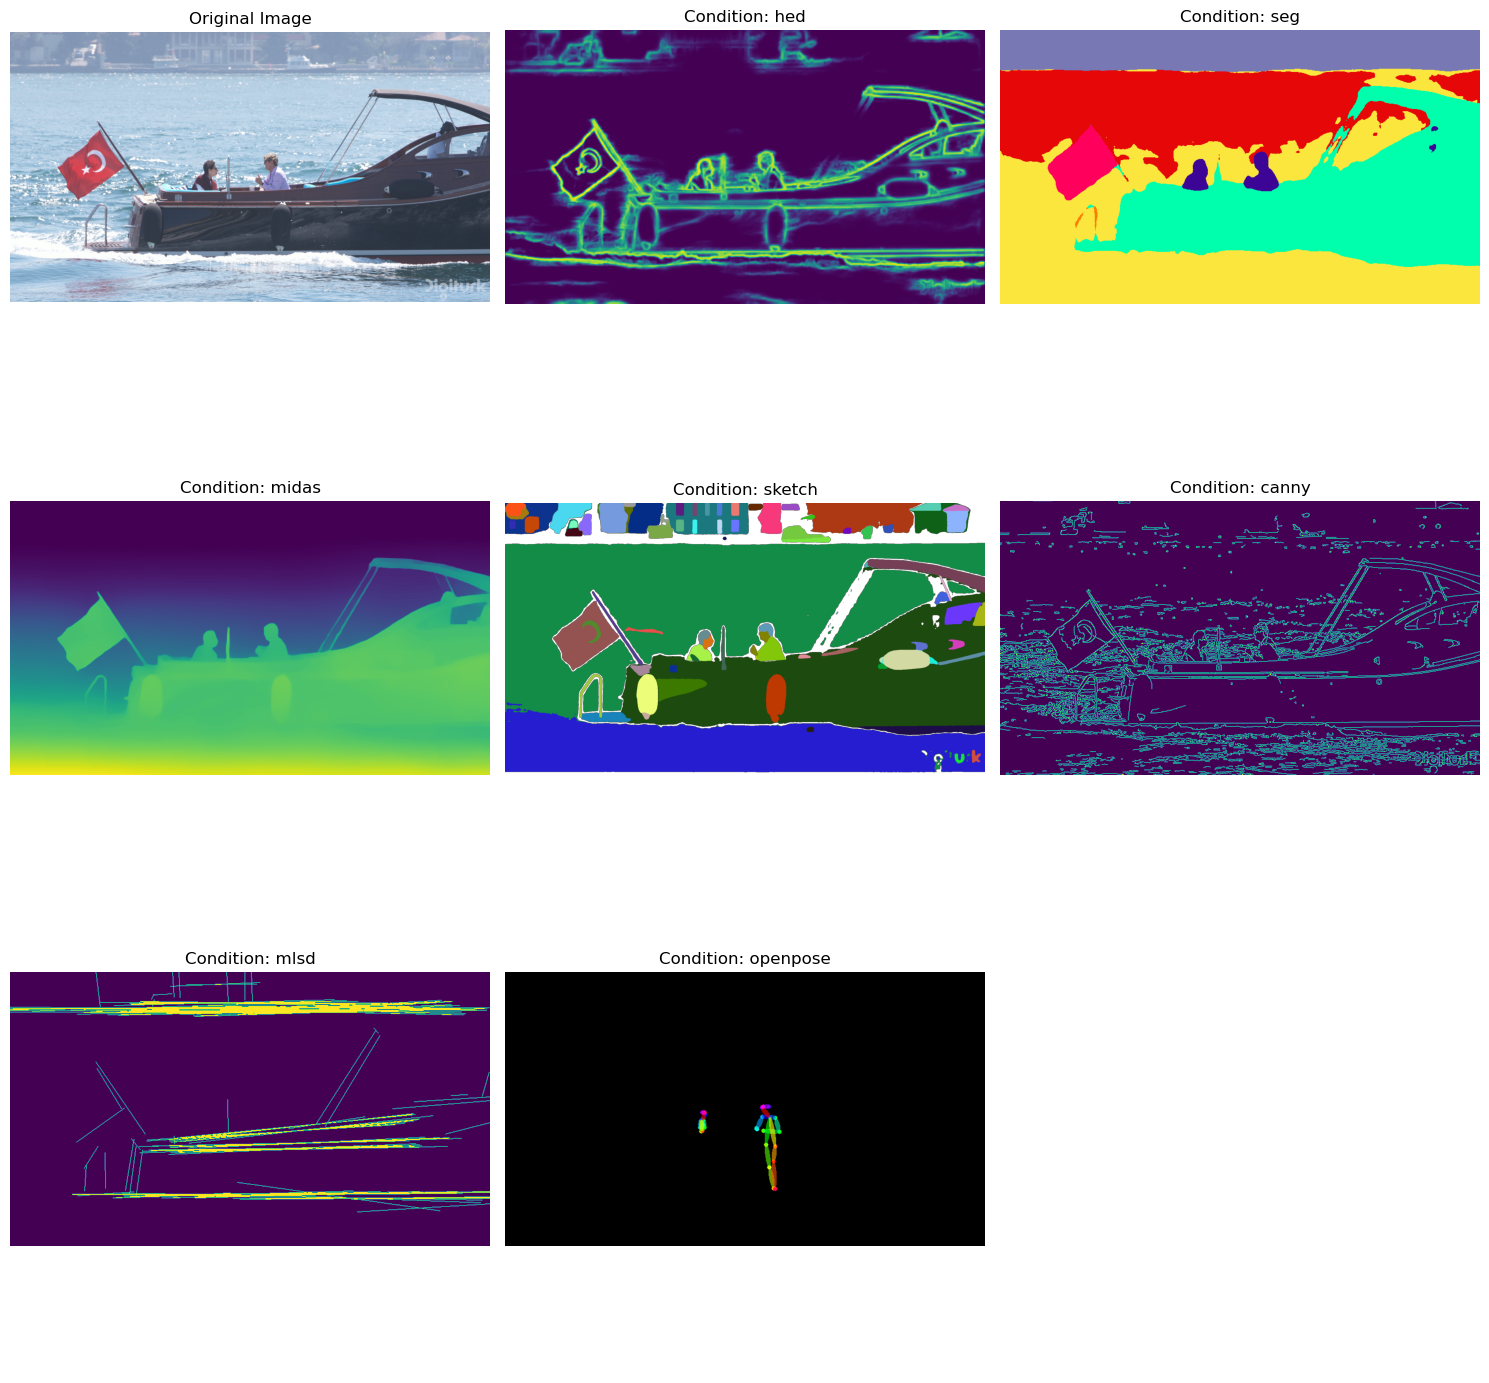

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

# Define the paths
data_folder = 'data'
images_folder = os.path.join(data_folder, 'images')
conditions_folder = os.path.join(data_folder, 'conditions')

# Function to load images
def load_image(image_path):
    return Image.open(image_path)

# Get the image path (assuming there's only one image in the images folder)
image_files = [os.path.join(images_folder, img) for img in os.listdir(images_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
image_path = image_files[0] if image_files else None

# Get all condition images
condition_images = {}
for condition in os.listdir(conditions_folder):
    condition_path = os.path.join(conditions_folder, condition)
    if os.path.isdir(condition_path):
        condition_images[condition] = [
            os.path.join(condition_path, img)
            for img in os.listdir(condition_path)
            if img.endswith(('.png', '.jpg', '.jpeg'))
        ]

# Calculate the number of columns based on the number of conditions
num_conditions = len(condition_images)
num_columns = math.ceil((num_conditions + 1) / 3)

# Plot the images
fig, axs = plt.subplots(3, num_columns, figsize=(15, 15))

# Plot the main image
if image_path:
    main_image = load_image(image_path)
    axs[0, 0].imshow(main_image)
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

# Plot the condition images
col_index = 1  # Start plotting conditions from the second column
for idx, (condition_name, image_paths) in enumerate(condition_images.items()):
    row = (idx + 1) // num_columns
    col = (idx + 1) % num_columns
    axs[row, col].imshow(load_image(image_paths[0]))
    axs[row, col].set_title(f'Condition: {condition_name}')
    axs[row, col].axis('off')

# Hide any remaining empty subplots
for idx in range(num_conditions + 1, 3 * num_columns):
    row = idx // num_columns
    col = idx % num_columns
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [9]:
import os
import shutil
from pathlib import Path

# Define the directories
image_folder = 'data/video_data/images'  # Path to the folder containing images
segmap_folder = 'data/video_data/conditions/seg'  # Path to the folder containing segmentation maps
content_folder = 'data/video_data/conditions/content/'  # Path to the folder where previous frames will be stored

# Create the content folder if it does not exist
if not os.path.exists(content_folder):
    os.makedirs(content_folder)

# List all image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

# Process each image file
for i, image_file in enumerate(image_files):
    # Determine the previous frame name
    if image_file.endswith('001.png'):
        previous_frame = image_file
        
    else:
        # For subsequent frames, use the previous image file
        previous_frame = image_files[i-1]
    
    # Construct the new file name
    new_name = Path(image_files[i]).name
    
    # Copy the previous frame to the content folder with the new name
    source_path = os.path.join(image_folder, previous_frame)
    dest_path = os.path.join(content_folder, new_name)
    print(source_path,'to', dest_path)
    shutil.copyfile(source_path, dest_path)

print("Files have been renamed and copied successfully.")


data/video_data/images/j_001.png to data/video_data/conditions/content/j_001.png
data/video_data/images/j_001.png to data/video_data/conditions/content/j_002.png
data/video_data/images/j_002.png to data/video_data/conditions/content/j_003.png
data/video_data/images/j_003.png to data/video_data/conditions/content/j_004.png
data/video_data/images/j_004.png to data/video_data/conditions/content/j_005.png
data/video_data/images/j_005.png to data/video_data/conditions/content/j_007.png
data/video_data/images/j_007.png to data/video_data/conditions/content/j_009.png
data/video_data/images/j_009.png to data/video_data/conditions/content/j_011.png
data/video_data/images/j_011.png to data/video_data/conditions/content/j_013.png
data/video_data/images/j_013.png to data/video_data/conditions/content/j_015.png
data/video_data/images/j_015.png to data/video_data/conditions/content/j_016.png
data/video_data/images/j_016.png to data/video_data/conditions/content/j_017.png
data/video_data/images/j_017

In [2]:
import os
import glob

def rename_files_in_subfolders(base_folder):
    # Traverse through all subfolders in the base folder
    for subdir, _, files in os.walk(base_folder):
        for file in files:
            # Check if the file ends with _0.png
            if file.endswith('_0.png'):
                # Create the new filename by removing _0
                new_name = file.replace('_0.png', '.png')
                # Construct full file paths
                old_file_path = os.path.join(subdir, file)
                new_file_path = os.path.join(subdir, new_name)
                # Rename the file
                os.rename(old_file_path, new_file_path)
                print(f"Renamed {old_file_path} to {new_file_path}")

# Define the base folder containing the subfolders
base_folder = 'data/conditions'

# Call the function to rename files
rename_files_in_subfolders(base_folder)


Renamed data/conditions/hed/y_048_0.png to data/conditions/hed/y_048.png
Renamed data/conditions/hed/r_021_0.png to data/conditions/hed/r_021.png
Renamed data/conditions/hed/r_059_0.png to data/conditions/hed/r_059.png
Renamed data/conditions/hed/j_037_0.png to data/conditions/hed/j_037.png
Renamed data/conditions/hed/j_003_0.png to data/conditions/hed/j_003.png
Renamed data/conditions/hed/s_003_0.png to data/conditions/hed/s_003.png
Renamed data/conditions/hed/j_043_0.png to data/conditions/hed/j_043.png
Renamed data/conditions/hed/j_016_0.png to data/conditions/hed/j_016.png
Renamed data/conditions/hed/y_024_0.png to data/conditions/hed/y_024.png
Renamed data/conditions/hed/y_004_0.png to data/conditions/hed/y_004.png
Renamed data/conditions/hed/r_006_0.png to data/conditions/hed/r_006.png
Renamed data/conditions/hed/r_039_0.png to data/conditions/hed/r_039.png
Renamed data/conditions/hed/j_004_0.png to data/conditions/hed/j_004.png
Renamed data/conditions/hed/y_025_0.png to data/con

In [1]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
import numpy as np
from utils import *
import glob
import json
import datasets as ds
import os

image_paths = glob.glob('/data/maryam.sana/Uni-ControlNet/data/images/*.png')
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

/data/maryam.sana/anaconda3/envs/compressai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-13 21:08:07.805886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 21:08:07.851309: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 21:08:10.926042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warni

In [2]:
def get_caption(frame):
    prompt = "<image>\nUSER:Give a detailed visual description of this image ?\nASSISTANT:"
    inputs = processor(text=prompt, images=frame, return_tensors="pt")
    generate_ids = model.generate(**inputs, max_length=200)
    caption_llava = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    return caption_llava.split('ASSISTANT:')[1]  

In [22]:
import cv2
import os

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                try:
                    img = cv2.imread(os.path.join(root, file))
                    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # print(image.shape, os.path.join(root, file))
                    if img is None:
                        print(f"Failed to read image: {file}")
                except Exception as e:
                    print(f"Error reading image {file}: {e}")

check_images('data/images')

In [18]:
# from PIL import Image

# anno_file = '/data/maryam.sana/Uni-ControlNet/data/data.txt'

# with open(anno_file, 'w') as anno:
#     for i, img_path in enumerate(image_paths[0:5]):
#         # Load image
#         frame = Image.open(img_path)
        
#         # Generate caption for the image
#         caption = get_caption(frame)
#         caption = " ".join(caption.split())
#         # print(caption)
        
#         # Get the file ID (assuming it's the filename without the extension)
#         file_id = os.path.splitext(os.path.basename(img_path))[0]
#         print(f"{file_id} {caption}\n")
        
#         anno.write(f"{file_id}\t{caption}\n")

# print(f"Annotation file {anno_file} has been created.")
  

In [24]:
import os

def read_processed_files(data_file):
    processed_files = set()
    with open(data_file, 'r') as file:
        for line in file:
            file_id, caption = line.strip().split('\t')
            processed_files.add(file_id)
    return processed_files

def get_all_png_files(directory):
    png_files = set()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.png'):
                file_id = os.path.splitext(file)[0]  # Remove the file extension
                png_files.add(file_id)
    return png_files

def find_unprocessed_files(png_directory, data_file):
    processed_files = read_processed_files(data_file)
    all_png_files = get_all_png_files(png_directory)
    unprocessed_files = all_png_files - processed_files
    return unprocessed_files

if __name__ == "__main__":
    png_directory = 'data/images/'
    data_file = './data/data.txt'
    file_list = []
    
    unprocessed_files = find_unprocessed_files(png_directory, data_file)
    if unprocessed_files:
        print("Unprocessed files:")
        for file in unprocessed_files:
            file_list.append(file)
            
            # print(f"{file}.png")
    else:
        print("All files are processed.")


Unprocessed files:


In [25]:
import glob

len(glob.glob('data/images/*.png'))

147

In [26]:
len(file_list)

73

In [27]:
file_list

['j_032',
 'r_036',
 'y_038',
 'y_044',
 'j_002',
 'r_039',
 'j_060',
 'r_019',
 'r_048',
 'r_017',
 'y_020',
 'y_053',
 'j_001-checkpoint',
 'j_005',
 'r_041',
 's_022',
 'r_059',
 'j_011',
 'r_007',
 'r_045',
 'r_008',
 'y_058',
 'r_054',
 'j_050',
 'j_026',
 'r_029',
 'j_020',
 'j_003',
 'r_046',
 'j_055',
 'j_021',
 's_029',
 'j_034',
 'j_025',
 'j_001',
 'y_039',
 'r_050',
 'y_054',
 'j_044',
 'r_005',
 'y_023',
 'y_048',
 's_001',
 'y_049',
 'r_052',
 'y_015',
 'j_049',
 'y_007',
 'y_009',
 'j_059',
 's_026',
 'j_043',
 'r_060',
 'y_047',
 's_014',
 's_020',
 'j_036',
 'j_045',
 'r_030',
 'j_013',
 'y_011',
 'j_023',
 'r_006',
 'j_046',
 'r_049',
 'y_059',
 'r_021',
 'j_002-checkpoint',
 'y_042',
 'y_040',
 'y_046',
 'r_058',
 'y_043']